## 2D - DCT (Discrete Cosine Transform) image compression

In [144]:
from IPython.display import Image, display

Downloaded http://www.hpca.ual.es/~vruiz/images/lena.png


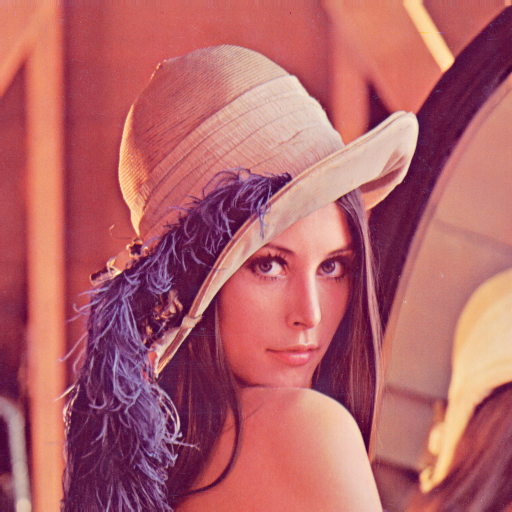

In [145]:
%run download_default_image.ipynb

In [146]:
!python ../src/LBT.py -h

usage: LBT.py [-h] [-g] {encode,decode} ...

Exploiting spatial redundancy with the 2D Discrete Cosine Transform of
constant block size.

positional arguments:
  {encode,decode}  You must specify one of the following subcomands:
    encode         Compress data
    decode         Uncompress data

options:
  -h, --help       show this help message and exit
  -g, --debug      Output debug information (default: False)


In [147]:
!python ../src/LBT.py encode -h

usage: LBT.py encode [-h] [-B BLOCK_SIZE_DCT] [-t COLOR_TRANSFORM] [-p]
                     [-L LAMBDA] [-x]

options:
  -h, --help            show this help message and exit
  -B, --block_size_DCT BLOCK_SIZE_DCT
                        Block size (default: 8)
  -t, --color_transform COLOR_TRANSFORM
                        Color transform (default: "YCoCg")
  -p, --perceptual_quantization
                        Use perceptual quantization (default: "False")
  -L, --Lambda LAMBDA   Relative weight between the rate and the distortion.
                        If provided (float), the block size is RD-optimized
                        between {2**i; i=1,2,3,4,5,6,7}. For example, if
                        Lambda=1.0, then the rate and the distortion have the
                        same weight.
  -x, --disable_subbands
                        Disable the coefficients reordering in subbands
                        (default: "False")


In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -q 32 --block_size 32
rm /tmp/decoded.png
python ../src/LBT.py decode -q 32 --block_size 32
python ../src/RDE.py

main Namespace(debug=False, subparser_name='encode', block_size_DCT=32, color_transform='YCoCg', perceptual_quantization=False, Lambda=None, disable_subbands=False, quantizer='deadzone', QSS=1, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x73a9b09aa660>)
Iniciando entrenamiento (N=1024)...
Epoch   0 | Loss: 0.000689 | MSE: 0.00000000 | Var(Y): 1452.2404
Epoch  10 | Loss: 1547.684937 | MSE: 1547.68298340 | Var(Y): 520.4578
Epoch  20 | Loss: 10132.685547 | MSE: 10132.68359375 | Var(Y): 466.6128
Epoch  30 | Loss: 3398.621582 | MSE: 3398.61840820 | Var(Y): 315.6418
Epoch  40 | Loss: 2364.982178 | MSE: 2364.97924805 | Var(Y): 340.3933
Epoch  50 | Loss: 40.937881 | MSE: 40.93748856 | Var(Y): 2555.1250


(INFO) entropy_image_coding: Written 734954 bytes in /tmp/encoded.tif


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=32, color_transform='YCoCg', perceptual_quantization=False, disable_subbands=False, quantizer='deadzone', QSS=1, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7ae2aa5c25c0>)
16 16
Code-stream file: /tmp/encoded.tif length: 734954
Code-stream file: /tmp/encoded_shape.bin length: 12
Original image: /tmp/original.png 512673 bytes (15.65) bits/pixel
Code-stream: ['/tmp/encoded.tif', '/tmp/encoded_shape.bin'] 734966 bytes (22.43) bits/pixel
Decoded image: /tmp/decoded.png 470970 bytes (14.37) bits/pixel
Images shape: (512, 512, 3)
Distortion (RMSE): 126.49
J = R + D = 148.92


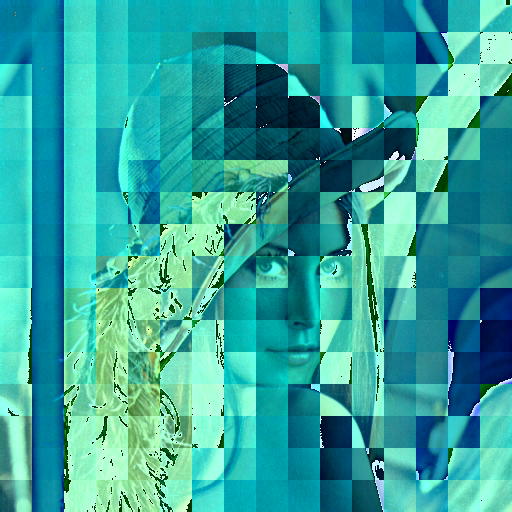

In [ ]:
display(Image(filename="/tmp/decoded.png"))

### Disable the reordering of the coefficients into subbands

In [150]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -x
rm /tmp/decoded.png
python ../src/LBT.py decode -x
python ../src/RDE.py

main Namespace(debug=False, subparser_name='encode', block_size_DCT=8, color_transform='YCoCg', perceptual_quantization=False, Lambda=None, disable_subbands=True, quantizer='deadzone', QSS=32, entropy_image_codec='TIFF', original='/tmp/original.png', encoded='/tmp/encoded', func=<function encode at 0x75108b9b6660>)
Iniciando entrenamiento (N=64)...
Epoch   0 | Loss: 0.000689 | MSE: 0.00000000 | Var(Y): 1452.2404
Epoch  10 | Loss: 10.158219 | MSE: 10.15737438 | Var(Y): 1184.0914
Epoch  20 | Loss: 39.208336 | MSE: 39.20733261 | Var(Y): 996.6302
Epoch  30 | Loss: 30.206110 | MSE: 30.20525169 | Var(Y): 1165.3533
Epoch  40 | Loss: 9.119597 | MSE: 9.11886978 | Var(Y): 1373.5553
Epoch  50 | Loss: 0.337586 | MSE: 0.33695135 | Var(Y): 1576.5980


(INFO) entropy_image_coding: Written 78659 bytes in /tmp/encoded.tif


Denoising filter = no_filter
main Namespace(debug=False, subparser_name='decode', block_size_DCT=8, color_transform='YCoCg', perceptual_quantization=False, disable_subbands=True, quantizer='deadzone', QSS=32, filter='no_filter', entropy_image_codec='TIFF', encoded='/tmp/encoded', decoded='/tmp/decoded.png', func=<function decode at 0x7259497be5c0>)


Traceback (most recent call last):
  File "/workspaces/VCF/notebooks/../src/RDE.py", line 5, in <module>
    from skimage import io as skimage_io # pip install scikit-image
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1412, in _handle_fromlist
  File "/root/.local/lib/python3.13/site-packages/lazy_loader/__init__.py", line 79, in __getattr__
    return importlib.import_module(f"{package_name}.{name}")
           ~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.13/importlib/__init__.py", line 88, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/root/.local/lib/python3.13/site-packages/skimage/io/__init__.py", line 5, in <module>
    from .manage_plugins import *
  File "/root/.local/lib/python3.13/site-packages/skimage/io/manage_plugins.py", line 26, in <module>
    from .collection import imread_collection_wrap

Process was interrupted.


CalledProcessError: Command 'b'rm /tmp/encoded*\npython ../src/LBT.py encode -x\nrm /tmp/decoded.png\npython ../src/LBT.py decode -x\npython ../src/RDE.py\n'' died with <Signals.SIGINT: 2>.

In [ ]:
display(Image(filename="/tmp/decoded.png"))

### Enable perceptual quantization

In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -p -q 4 -B 32
rm /tmp/decoded.png
python ../src/LBT.py decode -p -q 4 -B 32
python ../src/RDE.py

In [ ]:
display(Image(filename="/tmp/decoded.png"))

###  The same, but compressing more

In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -p -q 8 -B 32
rm /tmp/decoded.png
python ../src/LBT.py decode -p -q 8 -B 32
python ../src/RDE.py

In [ ]:
display(Image(filename="/tmp/decoded.png"))

## Using LloydMax

In [ ]:
%%bash
rm /tmp/encoded*
python ../src/LBT.py encode -a LloydMax -m -2048 -n 2047
rm /tmp/decoded.png
python ../src/LBT.py decode -a LloydMax -m -2048 -n 2047
python ../src/RDE.py

In [ ]:
display(Image(filename="/tmp/decoded.png"))